## Importing of necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Reading the dataset

In [2]:
df = pd.read_csv("User_Data.csv")
df.shape

(400, 5)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Data splitting

In [4]:
X = df.iloc[:,2:-1].values
y = df.iloc[:,-1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
X_train.shape

(320, 2)

In [6]:
y_train.shape

(320,)

In [7]:
X_test.shape

(80, 2)

In [8]:
y_test.shape

(80,)

## Data Preprocessing - Feature scaling

In [9]:
trf = StandardScaler()
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

## Choosing the right K value

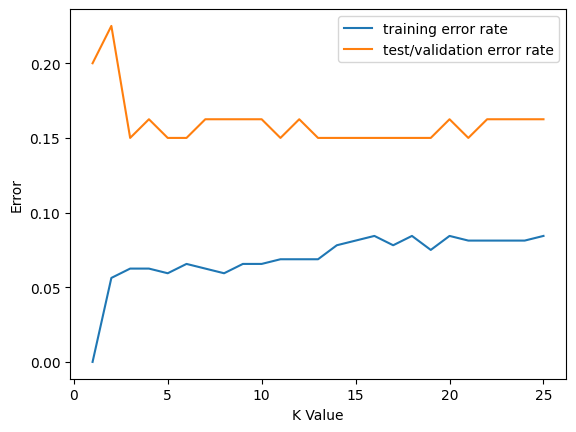

In [10]:
error_train=[]
error_test=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_trf,y_train)
    x=confusion_matrix(y_train,knn.predict(X_train_trf))
    y=confusion_matrix(y_test,knn.predict(X_test_trf))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())
# plot
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

## Prediction

In [12]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_trf, y_train)
y_pred = knn.predict(X_test_trf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.85
Confusion Matrix:
[[43  7]
 [ 5 25]]
